In [14]:
import torch
from torch import  nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from matplotlib import  pyplot as plt

In [2]:
# Download the training data from open datasets
training_data =  datasets.FashionMNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    download=True
)

# Download the testing data from open dataset
test_data = datasets.FashionMNIST(
    root="data",
    download=True,
    transform=ToTensor(),
    train=False
)

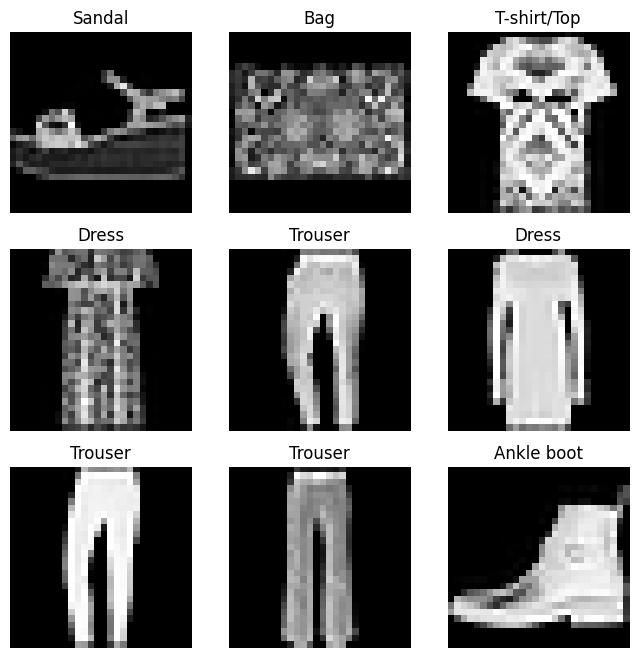

In [16]:
labels_map = {
    0:"T-shirt/Top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle boot"
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx  = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [3]:
batch_size = 64

# Create the Data Loader
train_dataloader = DataLoader(training_data, batch_size)
test_dataloader = DataLoader(test_data, batch_size)

for X, y in test_dataloader:
    print(f"The shape of our X is :[batch_size, color_channel, height, width]: {X.shape} ")
    print(f"The shape of our y is :[batch_size]: {y.shape} ")
    break

The shape of our X is :[batch_size, color_channel, height, width]: torch.Size([64, 1, 28, 28]) 
The shape of our y is :[batch_size]: torch.Size([64]) 


In [4]:
# write a device agnostic code depending on the processor we're using
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)

In [5]:
# Define the model architecture
class EniangNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten =  nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    


In [6]:
# create an object from our class
model = EniangNN().to(device)
print(model)

EniangNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Optimizing the model parameter

In [7]:
# create a loss function to measure the loss during our training and an optimizer for weight update
loss_fn =  nn.CrossEntropyLoss()
optimizer =  torch.optim.SGD(model.parameters(), lr=1e-3)

In [8]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y)  in enumerate(dataloader):
        X,y = X, y
        
        # compute the prediction error after the forward pass
        pred  =  model(X)
        loss =  loss_fn(pred, y)
        
        # Backpropagation to update the  weight
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if batch  %  100 == 0:
            loss, current = loss.item(), (batch+1) * len(X)
            print(f"The loss is :  {loss:>7f}   [{current:>5d} / {size:>5d}]")
            
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X, y
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    
    print(f"test Error :\n Accuracy: {(100*correct):>0.1f}%, average loss: {test_loss:>8f}  \n")

In [9]:
epoch = 5
for t in range(epoch):
    print(f"Epoch {t+1}\n=================================>")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Training don finish")

Epoch 1
=================================>
The loss is :  2.318676   [   64 / 60000]
The loss is :  2.297750   [ 6464 / 60000]
The loss is :  2.287676   [12864 / 60000]
The loss is :  2.276611   [19264 / 60000]
The loss is :  2.263717   [25664 / 60000]
The loss is :  2.246525   [32064 / 60000]
The loss is :  2.240890   [38464 / 60000]
The loss is :  2.217448   [44864 / 60000]
The loss is :  2.216620   [51264 / 60000]
The loss is :  2.177218   [57664 / 60000]
test Error :
 Accuracy: 46.6%, average loss: 2.174880  

Epoch 2
=================================>
The loss is :  2.194043   [   64 / 60000]
The loss is :  2.171128   [ 6464 / 60000]
The loss is :  2.126249   [12864 / 60000]
The loss is :  2.133984   [19264 / 60000]
The loss is :  2.083888   [25664 / 60000]
The loss is :  2.039427   [32064 / 60000]
The loss is :  2.053034   [38464 / 60000]
The loss is :  1.982520   [44864 / 60000]
The loss is :  1.991582   [51264 / 60000]
The loss is :  1.909214   [57664 / 60000]
test Error :
 Acc

# Saving the model

In [10]:
torch.save(model.state_dict(), "model.pth")
print("Saved the newly trained model state to model.pth")

Saved the newly trained model state to model.pth


# Loading the model

In [11]:
model =  EniangNN()
model.load_state_dict(torch.load("model.pth", weights_only=True))

<All keys matched successfully>

In [12]:
# classes of the target variable
classes = [
    "T-shirt/Top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

model.eval()
x, y =  test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x 
    pred =  model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f"Predicated: {predicted}, Actual:  {actual}")

Predicated: Ankle boot, Actual:  Ankle boot
